In [38]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
data = pd.read_csv('data\la-haute-borne-data-2017-2020.csv',delimiter = ";")
selected_columns = data[["Date_time","DCs_avg"]]
new_df = selected_columns.copy()

In [ ]:
# Set datetime
from datetime import datetime

new_df['Date_time'] = pd.to_datetime(data['Date_time'])
new_df['Date_time'] = pd.to_datetime(new_df['Date_time'], utc=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
st_y = StandardScaler()

X = st_x.fit_transform(new_df[['Date_time']])
Y = st_y.fit_transform(new_df[['DCs_avg']])

In [ ]:
fig = plt.figure()
ax = fig.add_axes([100,0,1,100])
ax.scatter(X,Y,color='r')

In [4]:
from sklearn.svm import SVR

# features:

# S -> Apparent Power
# Q -> Reactive Power
# Dst -> Generator stator temperatur
# Gb1t -> Gearbox bearing 1 temperature
# Yt -> Nacelle Temperature
# WS1 -> Wind Speed 1
# WS2 -> Wind SPeed 2

In [6]:
# del Nan
selected_columns = data[["P_avg","Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
df2 = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df2 = df2[df2['P_avg'].notna()]
df2 = df2[df2['Q_avg'].notna()]
df2 = df2[df2['Dst_avg'].notna()]
df2 = df2[df2['Gb1t_avg'].notna()]
df2 = df2[df2['Yt_avg'].notna()]
df2 = df2[df2['Ws1_avg'].notna()]
df2 = df2[df2['Ws2_avg'].notna()]

x = df2[["Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
y = df2['P_avg']

In [22]:
# get test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 23)


In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [24]:
from sklearn.svm import LinearSVR
svr = LinearSVR(random_state = 25)

In [25]:
svr.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=25)

In [31]:
y_pred = svr.predict(x_train)
y_pred

array([ 509.32696833,  329.32807055, 1497.32038295, ...,  381.48558894,
       -171.20818161,  404.41815609])

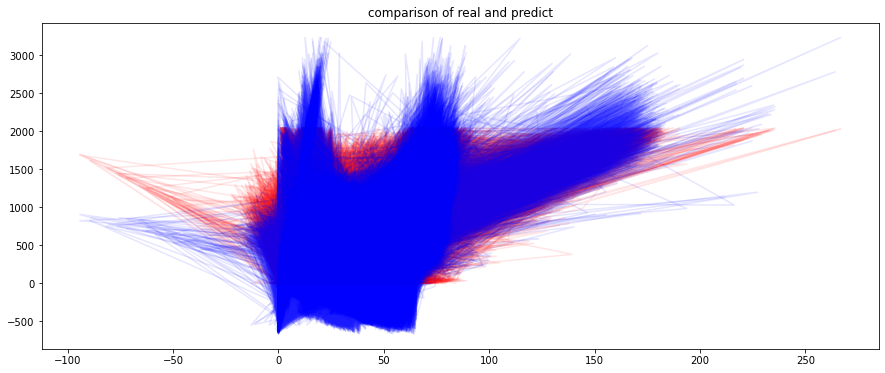

In [41]:
plt.plot(x_train, y_train, color = 'red', alpha=0.1)
#plt.plot(x_train, svr.predict(sc_x.transform(x_train)), color = 'blue', alpha=0.1)
plt.plot(x_train, svr.predict(x_train), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [33]:
y_pred = abs(svr.predict(x_test)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

MAE: 128.26975112634378
RMSE: 186.11578211731572


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8359242717958462

In [55]:
#https://pypi.org/project/properscoring/
import properscoring as ps
from scipy.stats import norm
ps.crps_gaussian(y_pred, mu=0, sig=1)

array([ 277.61623155,  439.07671244, 1134.70838147, ...,  725.13377758,
         99.61863026,  475.37485208])

In [56]:
# features:

# Ws -> Wind Speed
# Gost -> gearbox oil sump temp
# Ot_avg -> outdoor temp
# Rs_avg -> rotor speed
# Rbt_avg -> rotor bearing temp

In [57]:
selected_columns = data[["P_avg","Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['P_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Gost_avg'].notna()]
df = df[df['Ot_avg'].notna()]
df = df[df['Rs_avg'].notna()]
df = df[df['Rbt_avg'].notna()]

In [58]:
x2 = df[["Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
y2 = df['P_avg']

In [59]:
# get test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.1, random_state = 23)


In [60]:
from sklearn.svm import LinearSVR
svr = LinearSVR(random_state = 25)

In [61]:
svr.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=25)

In [62]:
y_pred = svr.predict(x_train)
y_pred

array([ 117.06785815,  729.68829676, 1734.47350588, ...,  -47.18239642,
        948.81272725, -317.66595637])

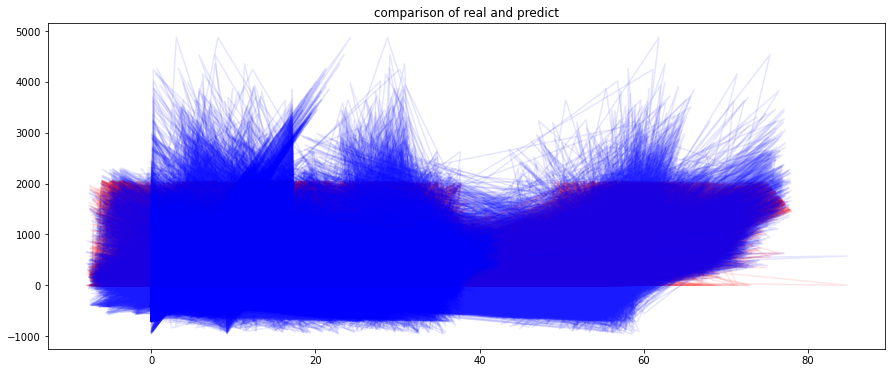

In [63]:
plt.plot(x_train, y_train, color = 'red', alpha=0.1)
#plt.plot(x_train, svr.predict(sc_x.transform(x_train)), color = 'blue', alpha=0.1)
plt.plot(x_train, svr.predict(x_train), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [64]:
y_pred = abs(svr.predict(x_test)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

MAE: 131.0644548547649
RMSE: 215.38541033285725


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7788313200386459